In [1]:
import numpy as np

This notebook aimed to do the experiment of recovering from noise as described in `02_noisy_SVD_recovery.ipynb`
- `np.random.rand(4, 1)` will give **uniform random** `shape=(4,1)` ndarray
- to arrive at the `outer()` function, we simply use matrix multiplication (of a col matrix and a row matrix)

In [2]:
np.vstack([np.zeros((3,1)), np.ones((4,1))])

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [3]:
def outer(v, w):
    """
    args
    v, ndarray of shape (m,)
    w, ndarray of shape (n,)

    return
ndarray of shape (m, 1)*(1, n), i.e. shape (m, n)
    """
    return v.reshape((-1, 1)) @ w.reshape((1, -1))

In [4]:
image = outer(np.concatenate([[1, 0.4], np.random.rand(50)]), np.random.rand(500))
image.shape

(52, 500)

In [5]:
image.dtype

dtype('float64')

### Add noise

`np.random.randn(d1, d2, ...)`

In [8]:
np.random.randn(*(1,2,3))

array([[[-0.33802916,  0.49168868,  0.44153042],
        [-0.77736203, -0.25101911,  0.05424161]]])

In [21]:
0.03 * np.random.randn(5)

array([-0.03080284,  0.01631193, -0.00119353,  0.00716747,  0.00965223])

In [10]:
noisy = image + 0.03 * np.random.randn(*image.shape)
noisy.shape

(52, 500)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

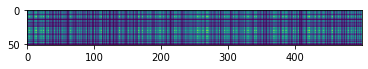

In [14]:
plt.imshow(image);

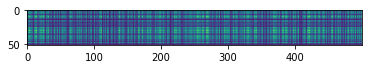

In [15]:
plt.imshow(noisy);

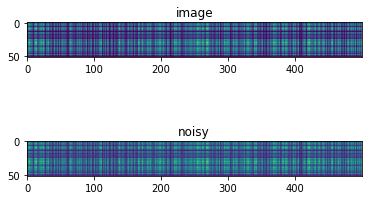

In [34]:
plt.subplot(2,1,1)
plt.imshow(image)
plt.title("image")
plt.subplot(2,1,2)
plt.imshow(noisy)
plt.title("noisy");

### SVD

In [11]:
U, S, Vh = np.linalg.svd(noisy)
U.shape, S.shape, Vh.shape

((52, 52), (52,), (500, 500))

In [22]:
U[:, 0].shape

(52,)

In [23]:
U[:, [0]].shape

(52, 1)

In [24]:
recovered = S[0] * U[:, [0]] @ Vh[[0], :]
recovered.shape

(52, 500)

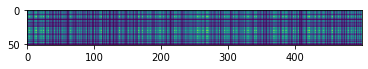

In [25]:
plt.imshow(recovered);

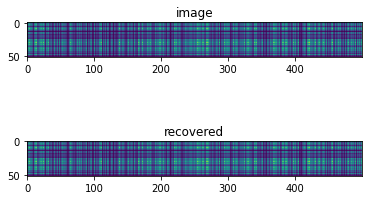

In [35]:
plt.subplot(2,1,1)
plt.imshow(image)
plt.title("image")
plt.subplot(2,1,2)
plt.imshow(recovered)
plt.title("recovered");

In [26]:
recovered - image

array([[ 2.87114185e-03, -2.14801467e-03, -7.32459521e-03, ...,
         9.86370115e-04, -2.32015783e-03,  9.88778042e-03],
       [ 1.26619135e-03, -3.54113417e-04, -2.57538958e-03, ...,
         4.37259542e-04, -3.69664331e-04,  4.30247650e-03],
       [ 1.12842607e-03, -2.93855001e-03, -5.19065823e-03, ...,
         3.79672304e-04, -3.21933895e-03,  4.09124976e-03],
       ...,
       [ 7.21027176e-04, -1.26372246e-04, -1.38344751e-03, ...,
         2.49282888e-04, -1.27567060e-04,  2.44265400e-03],
       [ 3.65178675e-04, -2.16792302e-05, -6.53952899e-04, ...,
         1.26415876e-04, -1.79771481e-05,  1.23298582e-03],
       [ 1.17193391e-04, -2.43194887e-04, -4.70648521e-04, ...,
         3.96677258e-05, -2.66047886e-04,  4.18827937e-04]])

In [28]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

In [29]:
np.linalg.norm(recovered-image, 'fro')

0.6962097619197434

In [32]:
np.linalg.norm(recovered-image, np.inf)

2.847734214871819

In [37]:
np.max(recovered), np.min(recovered)

(1.0007851524513638, -0.004431415704211655)

In [38]:
np.max(image), np.min(image)

(0.999845417771852, 3.1654364526412065e-05)

In [39]:
np.max(noisy), np.min(noisy)

(1.0530307256544977, -0.1007308427322478)